In [ ]:
import os
import scipy.io

dataPath = 'data'
subjectFiles = os.listdir(dataPath)
subject1Path = os.path.join(dataPath, subjectFiles[0])
subject1Files = os.listdir(subject1Path)
subject1Block1Path = os.path.join(subject1Path, subject1Files[0])
mat = scipy.io.loadmat(subject1Block1Path)

mdata = mat['data']
ndata = {n: mdata[n][0,0] for n in mdata.dtype.names}
fieldNames = [n for n, v in ndata.items()]
fieldNames

['EEG',
 'fs',
 'TR',
 'u',
 'm_category',
 'm_coherence',
 'EEG_noiseCov',
 'modulatory_type',
 'stimOnsetTime',
 'categoryIndx',
 'coherenceIndx',
 'EEG_raw',
 'EEG_filter',
 'fMRI',
 'L',
 'G',
 'mask',
 'Qx0',
 'Qy0',
 'HRF_orig',
 'HRF',
 'sDim',
 'whitenMatrix',
 'unwhitenMatrix',
 'L_norm',
 'L_3D',
 'L_project',
 'L_reducerank',
 'dipole_orientation',
 'sigma2_x']

In [34]:
fMRI = ndata['fMRI']
fMRI.shape

(6, 56000)

Matplotlib is building the font cache; this may take a moment.


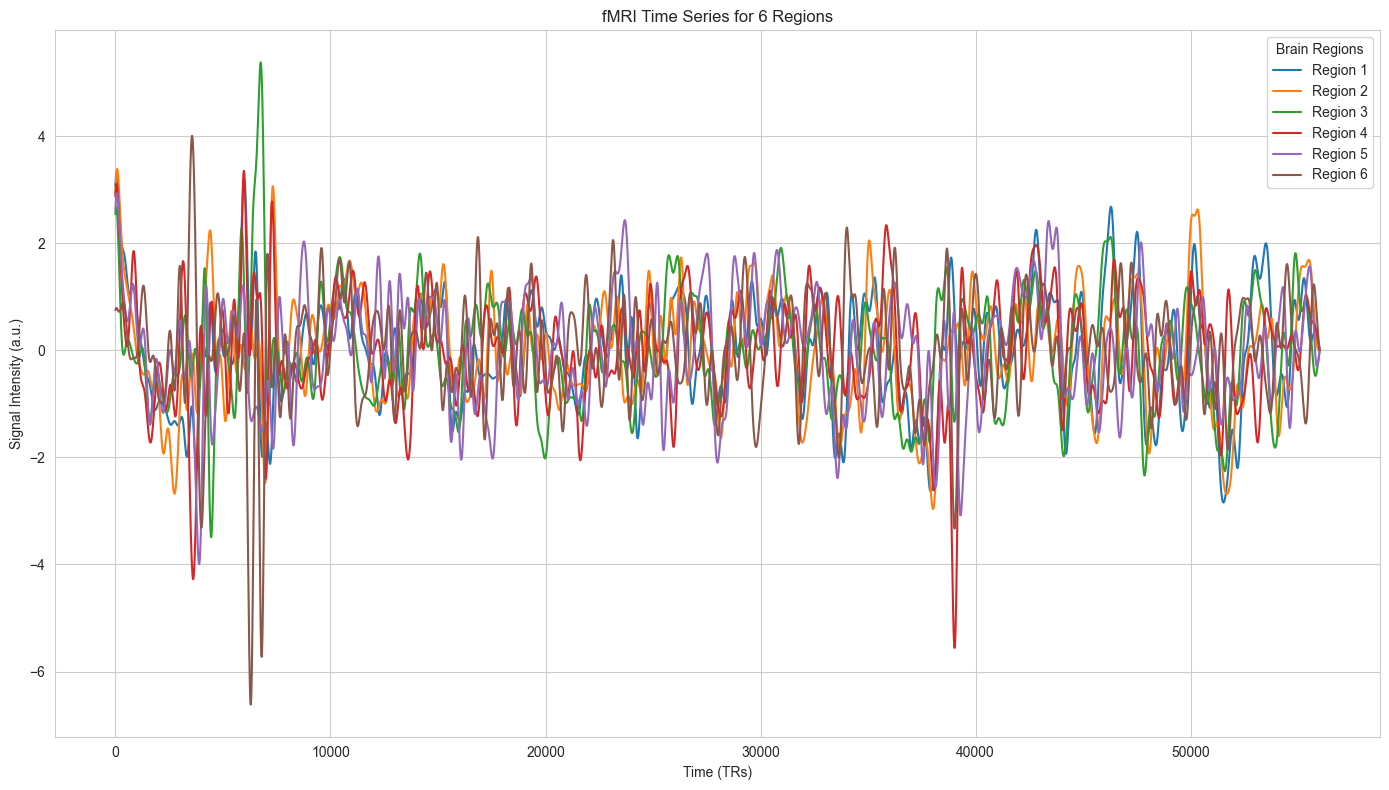

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example fMRI data: 6 regions, 56000 time points
data = fMRI

# Time axis (assuming 1 time point = 1 TR)
time = np.arange(data.shape[1])

# Set the Seaborn style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))

# Loop through each region and plot
for i in range(6):
    sns.lineplot(x=time, y=data[i, :], label=f'Region {i + 1}')

# Customize labels and legend
plt.title('fMRI Time Series for 6 Regions')
plt.xlabel('Time (TRs)')
plt.ylabel('Signal Intensity (a.u.)')
plt.legend(title="Brain Regions")
plt.tight_layout()

plt.show()


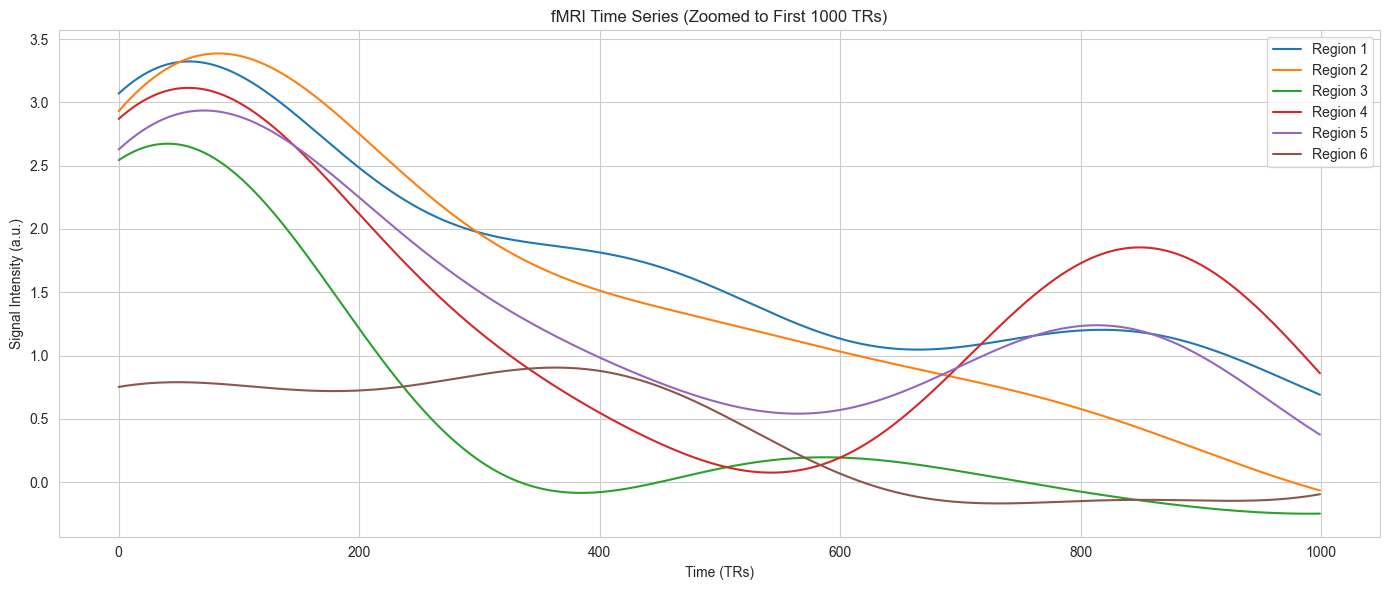

In [61]:
plt.figure(figsize=(14, 6))

for i in range(6):
    sns.lineplot(x=time[:1000], y=data[i, :1000], label=f'Region {i + 1}')

plt.title('fMRI Time Series (Zoomed to First 1000 TRs)')
plt.xlabel('Time (TRs)')
plt.ylabel('Signal Intensity (a.u.)')
plt.legend()
plt.tight_layout()

plt.show()


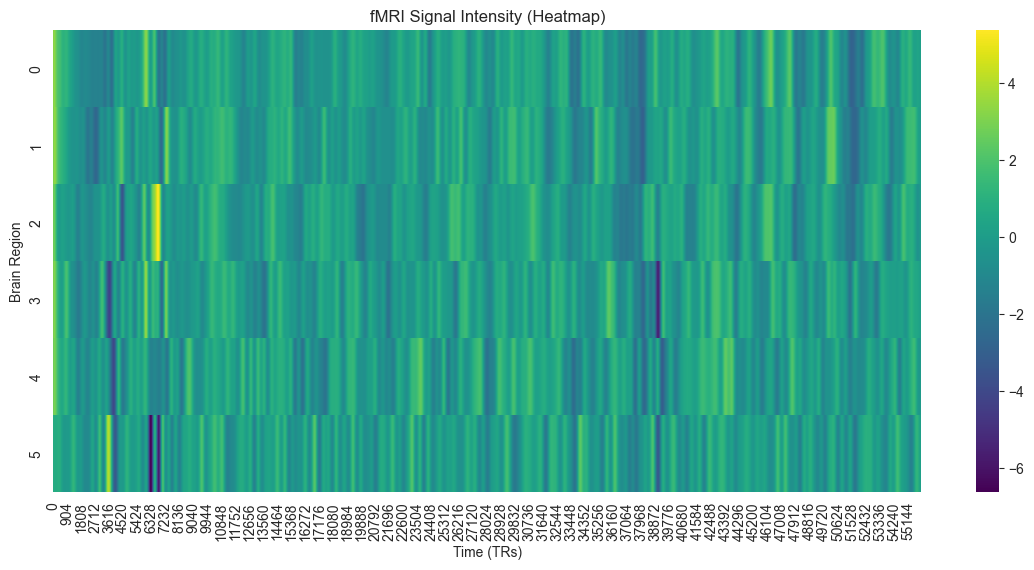

In [40]:
# Transpose data for heatmap (regions on y-axis)
plt.figure(figsize=(14, 6))
sns.heatmap(data, cmap='viridis', cbar=True)

plt.title('fMRI Signal Intensity (Heatmap)')
plt.ylabel('Brain Region')
plt.xlabel('Time (TRs)')
plt.show()

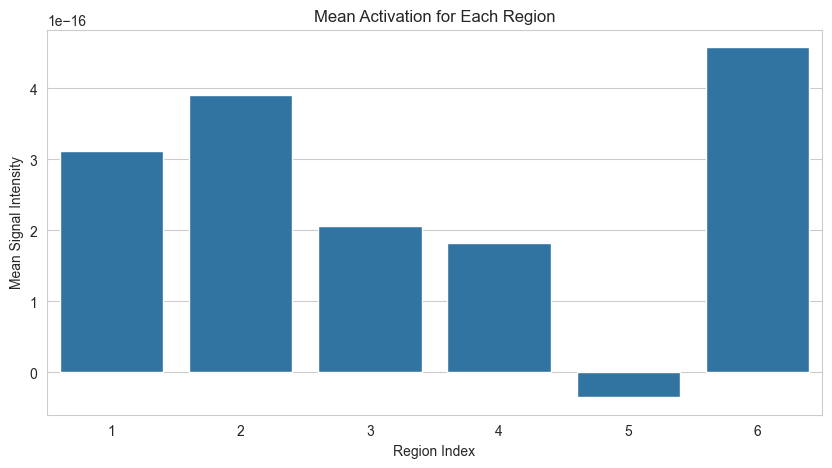

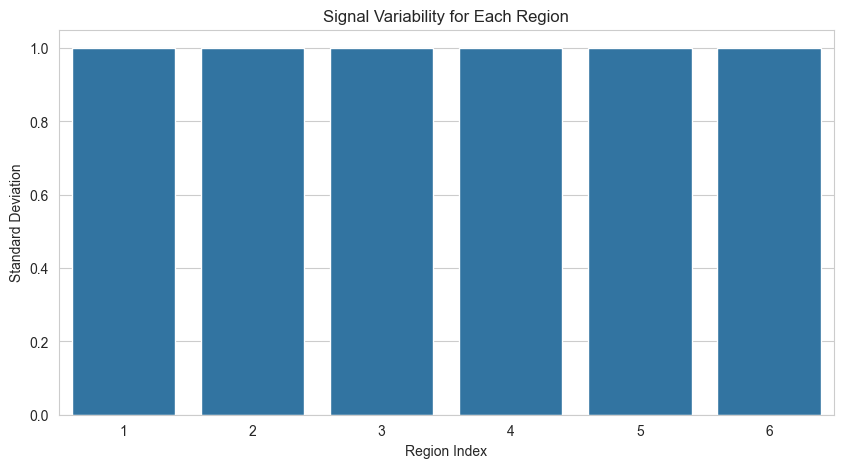

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean and standard deviation for each region
mean_signal = np.mean(data, axis=1)
std_signal = np.std(data, axis=1)

# Visualize mean activation levels
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(1, 7), y=mean_signal)
plt.title('Mean Activation for Each Region')
plt.xlabel('Region Index')
plt.ylabel('Mean Signal Intensity')
plt.show()

# Visualize signal variability
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(1, 7), y=std_signal)
plt.title('Signal Variability for Each Region')
plt.xlabel('Region Index')
plt.ylabel('Standard Deviation')
plt.show()


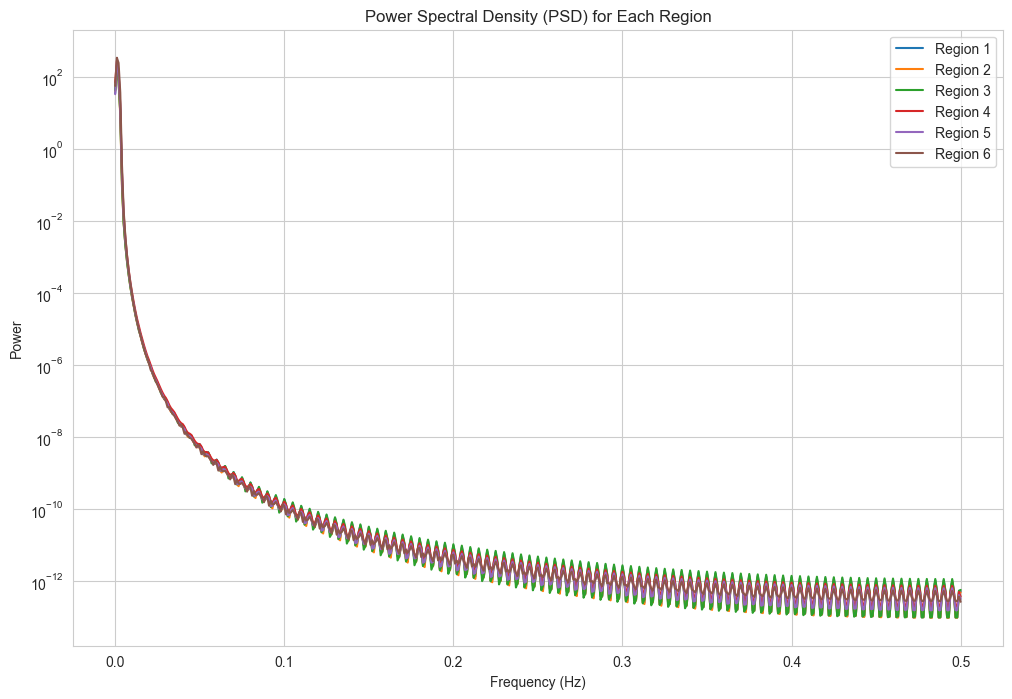

In [47]:
from scipy.signal import welch

# Calculate PSD for each region
fs = 1  # Assuming 1 TR = 1 second (adjust if needed)
freqs, psd = welch(data, fs=fs, nperseg=1000)

# Plot the power spectra for all regions
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.semilogy(freqs, psd[i], label=f'Region {i+1}')
plt.title('Power Spectral Density (PSD) for Each Region')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()


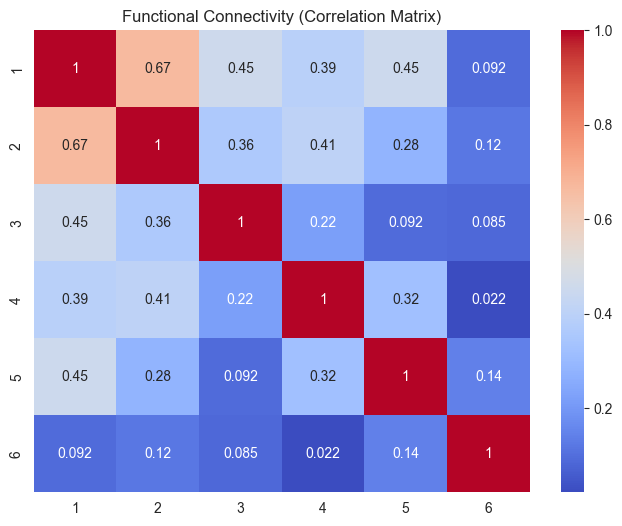

In [48]:
# Compute Pearson correlation matrix
corr_matrix = np.corrcoef(data)

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=np.arange(1, 7), yticklabels=np.arange(1, 7))
plt.title('Functional Connectivity (Correlation Matrix)')
plt.show()

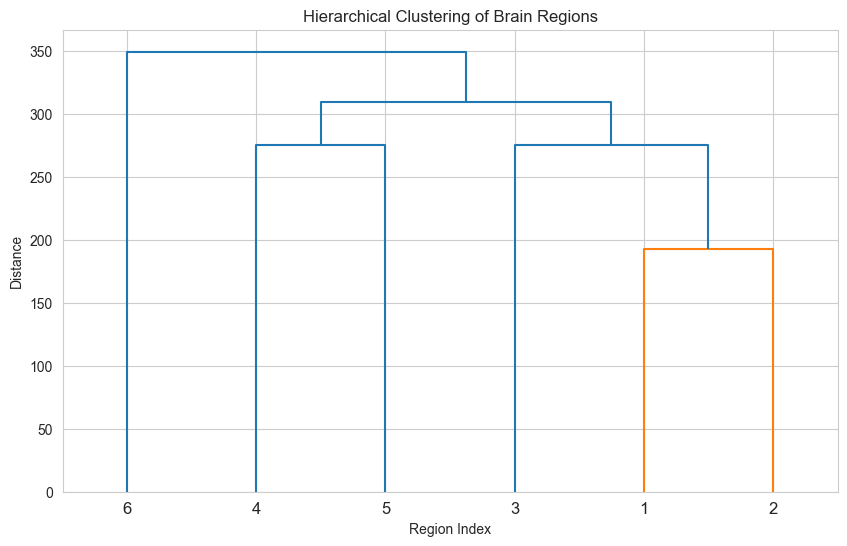

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(data, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=np.arange(1, 7))
plt.title('Hierarchical Clustering of Brain Regions')
plt.xlabel('Region Index')
plt.ylabel('Distance')
plt.show()

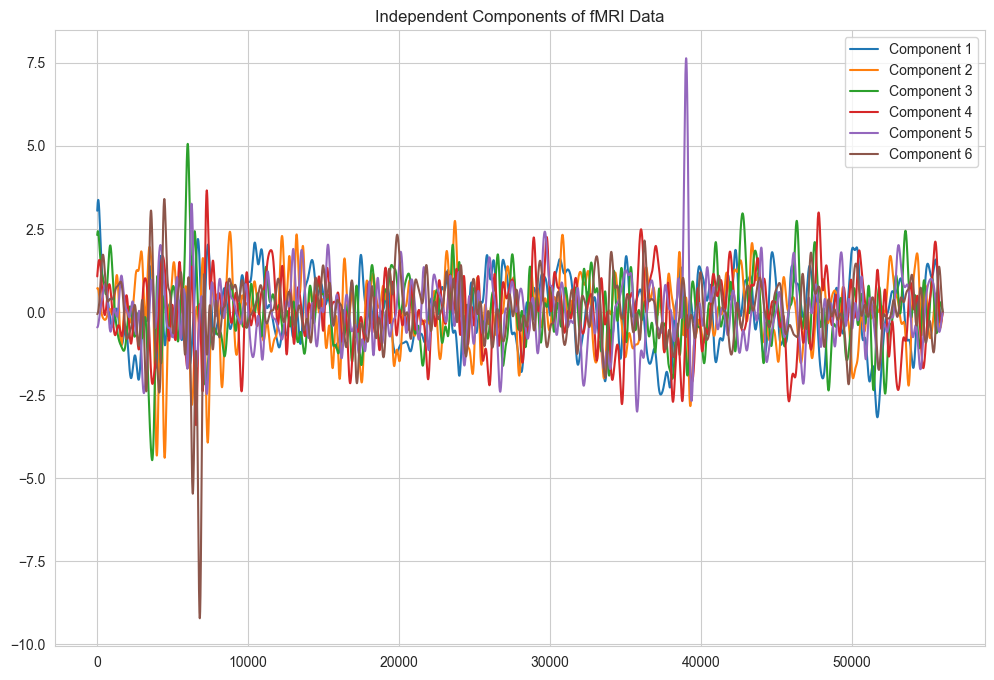

In [50]:
from sklearn.decomposition import FastICA

# Perform ICA to identify independent components
ica = FastICA(n_components=6)
sources = ica.fit_transform(data.T).T

# Plot the independent components
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(sources[i], label=f'Component {i+1}')
plt.title('Independent Components of fMRI Data')
plt.legend()
plt.show()

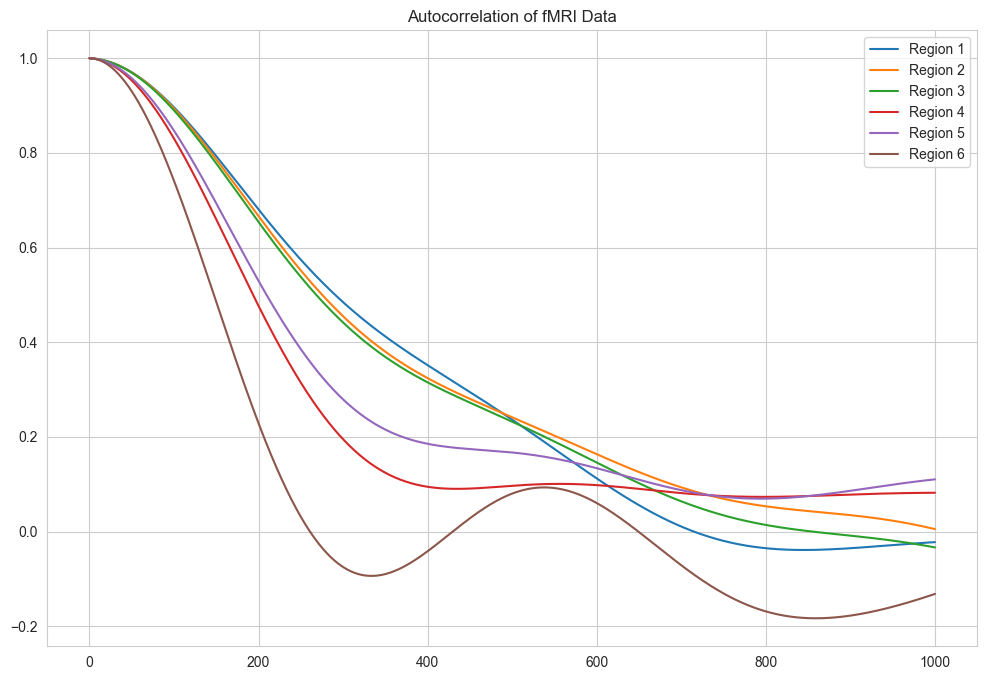

In [54]:
# Autocorrelation of each region (lags = 100 time points)
from statsmodels.tsa.stattools import acf

plt.figure(figsize=(12, 8))
for i in range(6):
    autocorr = acf(data[i], nlags=1000)
    plt.plot(autocorr, label=f'Region {i+1}')
plt.title('Autocorrelation of fMRI Data')
plt.legend()
plt.show()



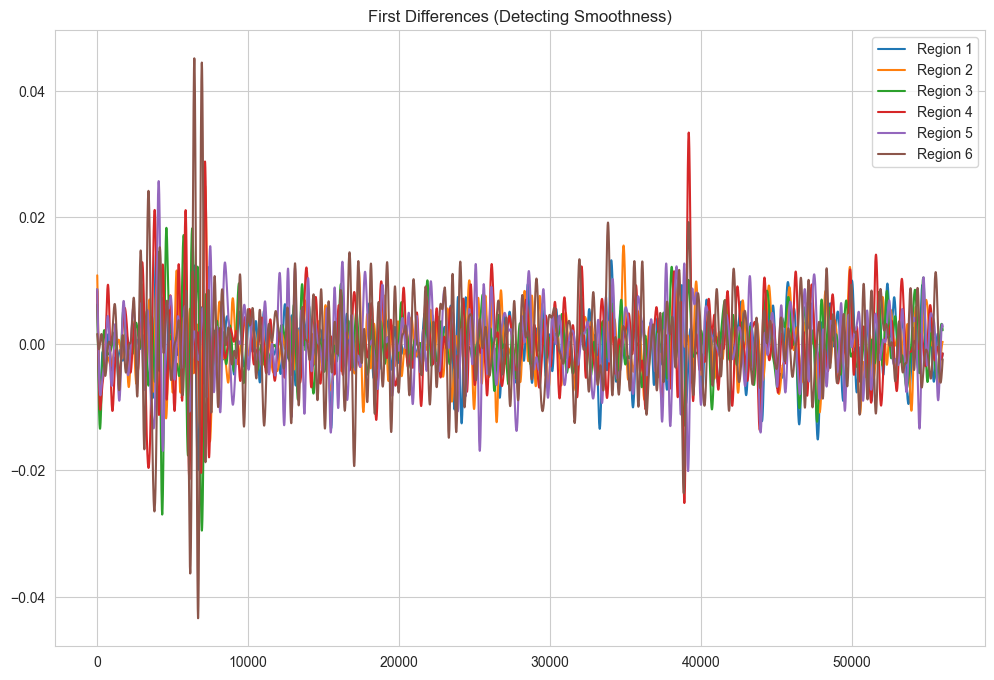

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# First-order difference (rate of change)
diff_data = np.diff(data, axis=1)

# Plot first differences to inspect smoothness
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(diff_data[i, :], label=f'Region {i+1}')
plt.title('First Differences (Detecting Smoothness)')
plt.legend()
plt.show()

## Mitigation for upsampling issue

Original shape: (6, 56000)
Downsampled shape: (6, 280)


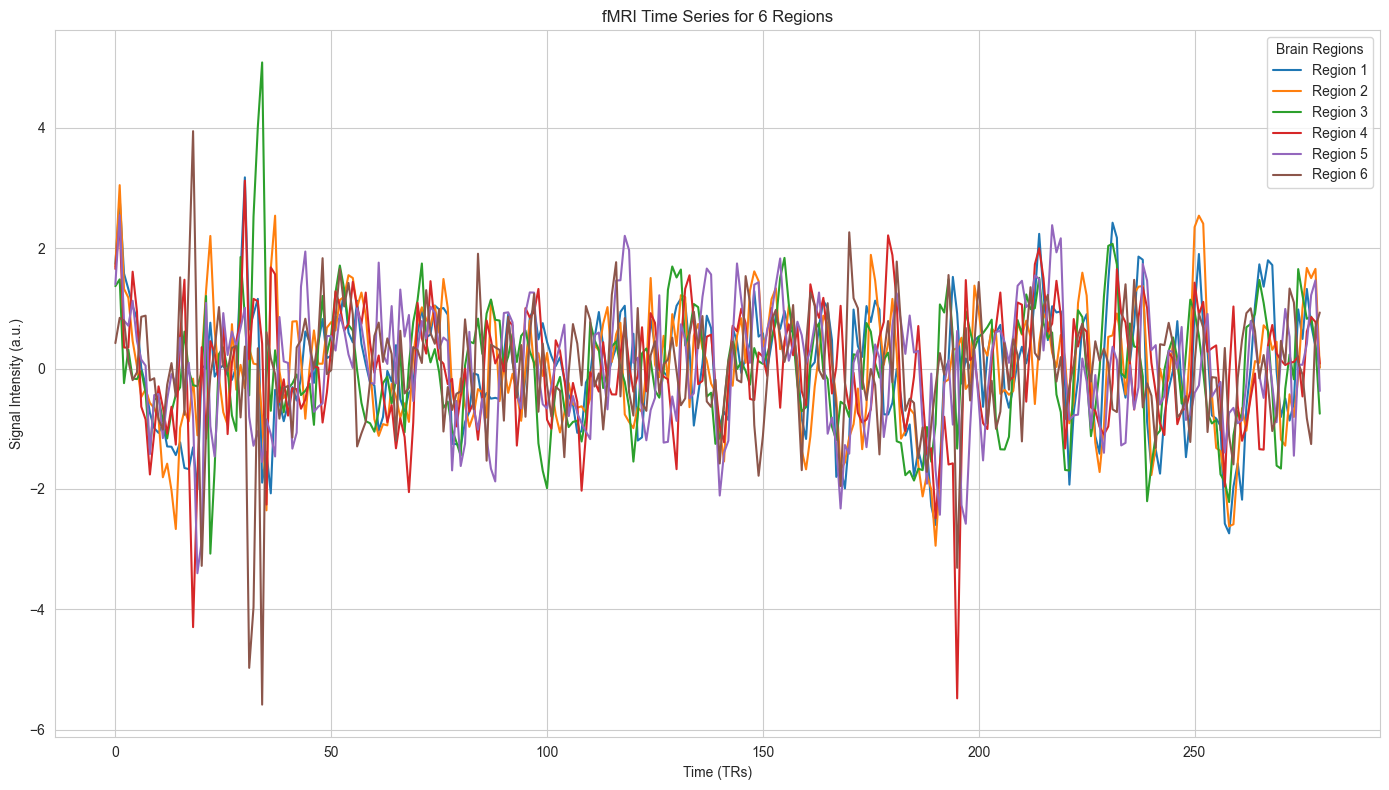

In [ ]:
# Downsample back to original sampling rate
from scipy.signal import resample

downsampled_data = resample(data, num=data.shape[1] // 200, axis=1)

# Check new dimensions
print("Original shape:", data.shape)
print("Downsampled shape:", downsampled_data.shape)

# Time axis (assuming 1 time point = 1 TR)
time = np.arange(downsampled_data.shape[1])

# Set the Seaborn style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))

# Loop through each region and plot
for i in range(6):
    sns.lineplot(x=time, y=downsampled_data[i, :], label=f'Region {i + 1}')

# Customize labels and legend
plt.title('fMRI Time Series for 6 Regions')
plt.xlabel('Time (TRs)')
plt.ylabel('Signal Intensity (a.u.)')
plt.legend(title="Brain Regions")
plt.tight_layout()

plt.show()

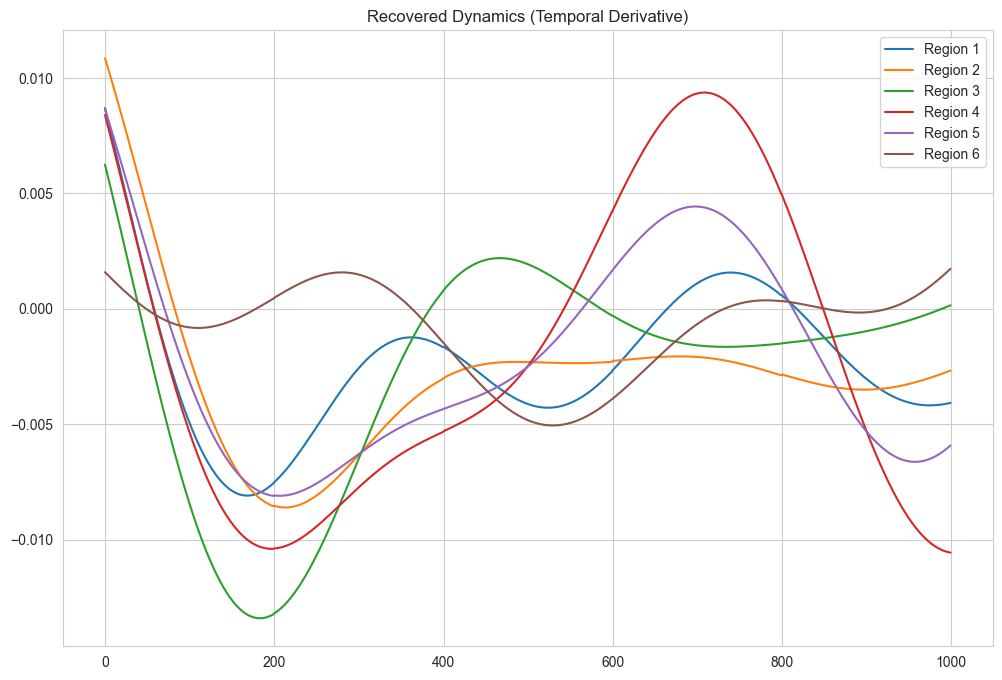

In [60]:
# Use rate of change (first derivative)
derivative_data = np.diff(data, axis=1)

# Restore original shape
derivative_data = np.hstack([derivative_data, np.zeros((data.shape[0], 1))])

# Visualize the derivative
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(derivative_data[i, :1000], label=f'Region {i+1}')
plt.title('Recovered Dynamics (Temporal Derivative)')
plt.legend()
plt.show()

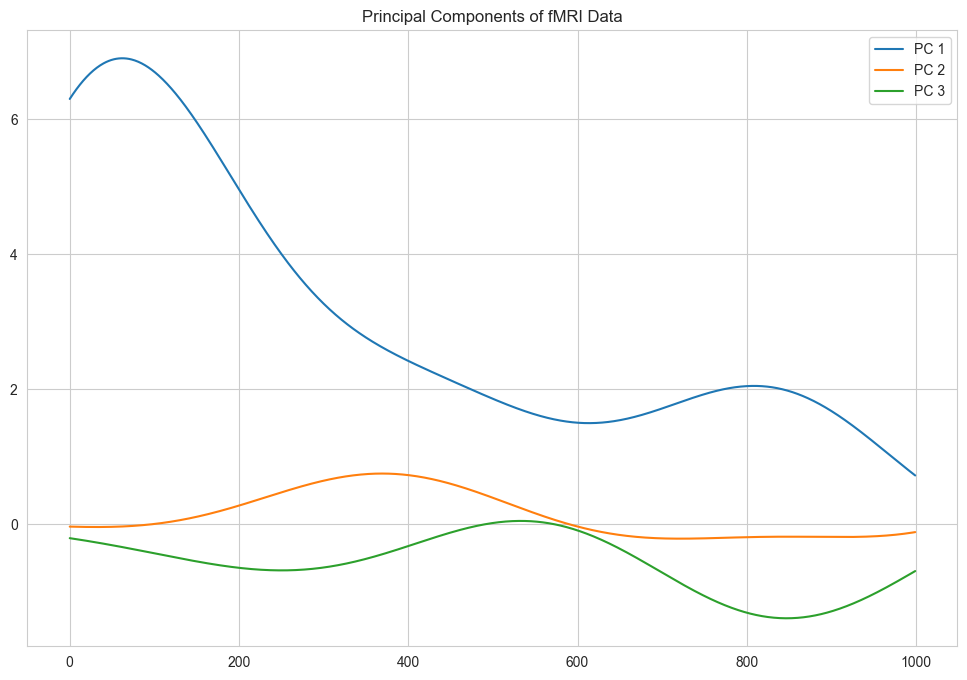

In [64]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# Apply PCA (preserve 3 components)
pca = PCA(n_components=3)
pca_components = pca.fit_transform(data.T).T

# Visualize the principal components
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.plot(pca_components[i, :1000], label=f'PC {i+1}')
plt.title('Principal Components of fMRI Data')
plt.legend()
plt.show()

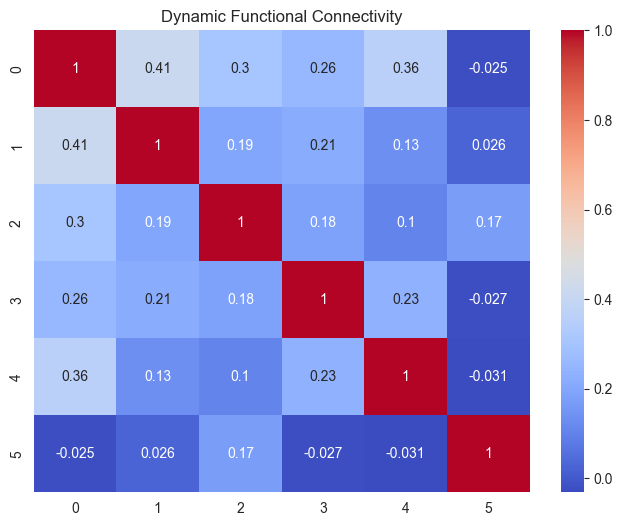

In [65]:
# Dynamic Functional Connectivity
window_size = 1000
step = 500

n_windows = (data.shape[1] - window_size) // step
dynamic_corr = np.zeros((6, 6, n_windows))

for w in range(n_windows):
    start = w * step
    end = start + window_size
    window_data = data[:, start:end]
    dynamic_corr[:, :, w] = np.corrcoef(window_data)

# Average connectivity over time
mean_dynamic_corr = np.mean(dynamic_corr, axis=2)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(mean_dynamic_corr, annot=True, cmap='coolwarm')
plt.title('Dynamic Functional Connectivity')
plt.show()
